In [10]:
import numpy as np
import matplotlib.pyplot as plt
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

8.425653058372838
[7.07156891e+01 7.41827818e-06 1.43128253e-09]


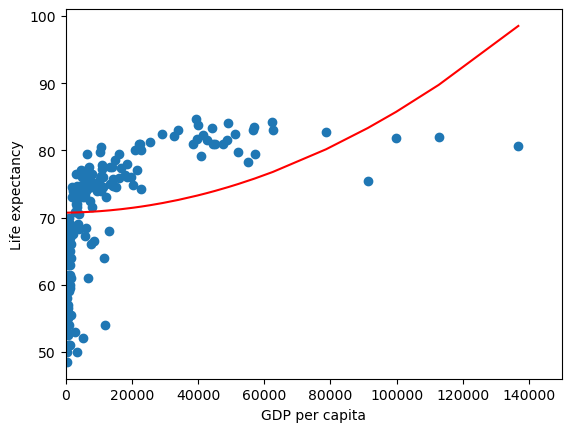

In [11]:
gdpC = np.array(np.multiply(np.divide(nations[:,3],nations[:,6]),1000000))
plt.scatter(gdpC, nations[:,4])
plt.xlim(0, 150000)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")


def coeffients(number):

    cV = np.array([0.0, 0.0, 0.0])
    cV[0] = np.random.uniform(low= 0, high=100.0, size=1)
    cV[1] = np.random.uniform(low=-0.00001, high=0.00001, size=1)
    cV[2] = np.random.uniform(low=-0.00000001, high=0.00000001, size=1)

    return cV


def polynomial(x, coeffients):
    y = 0
    for i in range(coeffients.shape[0]):
        y = np.add(y, np.multiply(coeffients[i], np.power(x, i)))

    return y

kArray = np.empty((0,3), float)
bestk = np.empty((0,3), float)
lifespan_expected = np.empty((0,1), float)
lifespan = nations[:,4]
gdp_per_capita = np.multiply(np.divide(nations[:,3], nations[:,6]), 1000000)

lowestRMSE = 100000000

# noch umschreiben zu sum
def rmse(orig, expec):
    rmseN = np.sqrt(np.sum(np.power((orig - expec), 2)/orig.shape[0]))
    return rmseN


for i in range(10000):
    kArray = np.append(kArray, [coeffients(3)], axis= 0)
    lifespan_expected = polynomial(gdpC, kArray[i])

    currentrmse = rmse(lifespan, lifespan_expected)
    if currentrmse < lowestRMSE:
        lowestRMSE = currentrmse
        bestk = kArray[i]

gdp_per_capita_sorted = np.sort(gdp_per_capita)
polyy = polynomial(gdp_per_capita_sorted, bestk)

print(lowestRMSE)
print(bestk)

plt.plot(gdp_per_capita_sorted, polyy, 'r-')
plt.show()
